In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

def labelizza(df, df2):
    df["label"] = df2["label"]
    return

def indicizza(df):
    df["indice"] = [i for i in range(len(df))]
    return

from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from pyts.transformation import ShapeletTransform
from sktime.transformations.panel.shapelets import ContractedShapeletTransform
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.neighbors import KNeighborsClassifier
from pyts.classification import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df1 = pd.read_fwf(r"body_acc_x_train.txt", header=None)
df1_test = pd.read_fwf(r"body_acc_x_test.txt", header=None)

In [ ]:
df2 = pd.read_fwf(r"body_acc_y_train.txt", header=None)
df2_test = pd.read_fwf(r"body_acc_y_test.txt", header=None)
df3 = pd.read_fwf(r"body_acc_z_train.txt", header=None)
df3_test = pd.read_fwf(r"body_acc_z_test.txt", header=None)

df4 = pd.read_fwf(r"body_gyro_x_train.txt", header=None)
df4_test = pd.read_fwf(r"body_gyro_x_test.txt", header=None)
df5 = pd.read_fwf(r"body_gyro_y_train.txt", header=None)
df6 = pd.read_fwf(r"body_gyro_z_train.txt", header=None)
df6_test = pd.read_fwf(r"body_gyro_z_test.txt", header=None)
df7 = pd.read_fwf(r"total_acc_x_train.txt", header=None)
df8 = pd.read_fwf(r"total_acc_y_train.txt", header=None)
df9 = pd.read_fwf(r"total_acc_z_train.txt", header=None)

In [ ]:
dfytrain = pd.read_fwf('y_train.txt', header=None)
dfytrain.rename({0: 'label'}, axis=1, inplace=True)

dfytest = pd.read_fwf('y_test.txt', header=None)
dfytest.rename({0: 'label'}, axis=1, inplace=True)

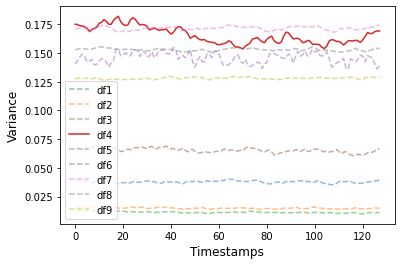

In [ ]:
plt.plot(df1.var(), ls = "--", alpha = 0.5)
plt.plot(df2.var(), ls = "--", alpha = 0.5)
plt.plot(df3.var(), ls = "--", alpha = 0.5)
plt.plot(df4.var())
plt.plot(df5.var(), ls = "--", alpha = 0.5)
plt.plot(df6.var(), ls = "--", alpha = 0.5)
plt.plot(df7.var(), ls = "--", alpha = 0.5)
plt.plot(df8.var(), ls = "--", alpha = 0.5)
plt.plot(df9.var(), ls = "--", alpha = 0.5)
plt.legend(["df"+str(i) for i in range(1,10)])
plt.xlabel("Timestamps", fontsize= 12)
plt.ylabel("Variance", fontsize= 12)
plt.show()

In [ ]:
l = [df1,df2,df3,df4,df5,df6,df7,df8,df9]
# for i in range(len(l)):
#     indicizza(l[i])
for i in range(len(l)):
    labelizza(l[i], dfytrain)

labelizza(df1_test,dfytest)

# for i in range(len(l)):
#     plt.plot(l[i].var())
#     plt.show()

df1_test

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,-0.001247,0.002848,0.002355,0.002721,0.003255,0.001301,0.001292,0.001470,0.002574,5
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,0.000163,-0.001095,-0.004547,-0.005310,-0.004094,0.002200,0.007788,0.003433,-0.001239,5
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,-0.003586,-0.003860,-0.003560,-0.000974,0.001052,0.000778,-0.000743,-0.001923,-0.004305,5
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.000978,0.002248,0.003530,-0.000117,-0.003275,-0.001325,0.000597,-0.000246,-0.000269,5
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.004918,0.003647,0.002481,0.004855,0.006754,0.004633,0.002157,-0.000869,-0.001329,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.107662,0.124079,0.183420,0.289247,0.393799,0.446456,0.436931,0.363053,0.279962,0.152701,...,-0.230325,-0.120717,-0.097928,-0.154805,-0.084908,-0.131883,-0.145651,-0.154956,-0.201542,2
2943,-0.042392,-0.017244,0.015269,0.064482,0.086802,0.084482,0.101578,0.130484,0.208370,0.310620,...,0.561624,0.523547,0.366543,0.109336,-0.280305,-0.250735,0.049391,0.012861,0.035633,2
2944,-0.147647,-0.169903,-0.168698,-0.138600,-0.144781,-0.072979,-0.040348,-0.023016,-0.025176,-0.074406,...,0.147866,0.168442,0.211400,0.328852,0.537643,0.638592,0.497893,0.214127,-0.114509,2
2945,0.071227,-0.088665,-0.070675,-0.116887,-0.214117,-0.219928,-0.275024,-0.229062,-0.245309,-0.242260,...,-0.083458,-0.085439,-0.100470,-0.067287,0.018514,0.097981,0.185988,0.273711,0.353674,2


In [ ]:
attributes = [col for col in df1.columns if col != 'label']

X_train = df1[attributes].values
y_train = np.array(df1['label'])

X_test = df1_test[attributes].values
y_test = np.array(df1_test['label'])

# Data Normalization

In [ ]:
scaler = TimeSeriesScalerMinMax()
#X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1])
#X_test = scaler.fit_transform(X_test).reshape(X_test.shape[0], X_test.shape[1])



# KNN

In [ ]:
clf = KNeighborsClassifier(p=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6107906345436037
F1-score [0.81906615 0.6927593  0.76203576 0.34419552 0.48780488 0.60587639]
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       496
           2       0.64      0.75      0.69       471
           3       0.90      0.66      0.76       420
           4       0.34      0.34      0.34       491
           5       0.45      0.53      0.49       532
           6       0.66      0.56      0.61       537

    accuracy                           0.61      2947
   macro avg       0.63      0.61      0.62      2947
weighted avg       0.62      0.61      0.61      2947



In [ ]:
clf = KNeighborsClassifier(p=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6247030878859857
F1-score [0.84365782 0.72382851 0.80212483 0.35282051 0.48979592 0.59175258]
              precision    recall  f1-score   support

           1       0.82      0.86      0.84       496
           2       0.68      0.77      0.72       471
           3       0.91      0.72      0.80       420
           4       0.36      0.35      0.35       491
           5       0.45      0.54      0.49       532
           6       0.66      0.53      0.59       537

    accuracy                           0.62      2947
   macro avg       0.65      0.63      0.63      2947
weighted avg       0.64      0.62      0.63      2947



In [ ]:
clf = KNeighborsClassifier(p=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6375975568374618
F1-score [0.85574092 0.75229358 0.84237726 0.34933606 0.50682594 0.57791538]
              precision    recall  f1-score   support

           1       0.83      0.88      0.86       496
           2       0.72      0.78      0.75       471
           3       0.92      0.78      0.84       420
           4       0.35      0.35      0.35       491
           5       0.46      0.56      0.51       532
           6       0.65      0.52      0.58       537

    accuracy                           0.64      2947
   macro avg       0.66      0.64      0.65      2947
weighted avg       0.65      0.64      0.64      2947



In [ ]:
clf = KNeighborsClassifier(metric = "dtw_sakoechiba")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5961995249406176
F1-score [0.82940622 0.71805274 0.78226858 0.32678387 0.41126761 0.54580153]
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       496
           2       0.69      0.75      0.72       471
           3       0.86      0.71      0.78       420
           4       0.33      0.32      0.33       491
           5       0.41      0.41      0.41       532
           6       0.56      0.53      0.55       537

    accuracy                           0.60      2947
   macro avg       0.61      0.60      0.60      2947
weighted avg       0.60      0.60      0.59      2947



In [ ]:
np.random.seed(0)
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.05,
                                                       r=2)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 7352
ts_sz 128
n_classes 6
shapelet_sizes {6: 6, 12: 6}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=0.01,
                        max_iter=200,
                        verbose=1)

C:\Users\maria\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [ ]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
29/29 [==============================] - 0s 6ms/step - loss: 1.8644 - categorical_accuracy: 0.1775 - categorical_crossentropy: 1.7899
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8628 - categorical_accuracy: 0.1982 - categorical_crossentropy: 1.7893
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8614 - categorical_accuracy: 0.2046 - categorical_crossentropy: 1.7886
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8600 - categorical_accuracy: 0.2025 - categorical_crossentropy: 1.7881
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8586 - categorical_accuracy: 0.2033 - categorical_crossentropy: 1.7875
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8573 - categorical_accuracy: 0.2017 - categorical_crossentropy: 1.7871
Epoch 7/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8561 - categorical_accuracy: 0.2014 - categorical

29/29 [==============================] - 0s 5ms/step - loss: 1.8021 - categorical_accuracy: 0.2085 - categorical_crossentropy: 1.7804
Epoch 112/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8019 - categorical_accuracy: 0.2101 - categorical_crossentropy: 1.7804
Epoch 113/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8016 - categorical_accuracy: 0.2107 - categorical_crossentropy: 1.7803
Epoch 114/200
29/29 [==============================] - 0s 6ms/step - loss: 1.8014 - categorical_accuracy: 0.2093 - categorical_crossentropy: 1.7803
Epoch 115/200
29/29 [==============================] - 0s 6ms/step - loss: 1.8012 - categorical_accuracy: 0.2103 - categorical_crossentropy: 1.7803
Epoch 116/200
29/29 [==============================] - 0s 6ms/step - loss: 1.8009 - categorical_accuracy: 0.2101 - categorical_crossentropy: 1.7803
Epoch 117/200
29/29 [==============================] - 0s 5ms/step - loss: 1.8007 - categorical_accuracy: 0.2111 - categorical

LearningShapelets(max_iter=200, n_shapelets_per_size={6: 6, 12: 6}, verbose=1,
                  weight_regularizer=0.01)

In [ ]:
y_pred = shp_clf.predict(X_test)

12/12 [==============================] - 0s 8ms/step


In [ ]:
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4251781472684085
F1-score [0.49334698 0.41723356 0.55035129 0.30111902 0.37655417 0.43470149]
              precision    recall  f1-score   support

           1       0.50      0.49      0.49       496
           2       0.45      0.39      0.42       471
           3       0.54      0.56      0.55       420
           4       0.30      0.30      0.30       491
           5       0.36      0.40      0.38       532
           6       0.44      0.43      0.43       537

    accuracy                           0.43      2947
   macro avg       0.43      0.43      0.43      2947
weighted avg       0.43      0.43      0.43      2947

